# Textractor

* [Textractor Documentation](https://aws-samples.github.io/amazon-textract-textractor/index.html)

> utilities to call Textract services, convert JSON responses from API calls to programmable objects, visualize entities on the document and export document data is compatible formats. It is intended to aid Textract customers in setting up their post-processing pipelines.

* [Textractor Github](https://github.com/aws-samples/amazon-textract-textractor)

# Dependencies

## Poppler
Documentation does not say but pdf2image requires poppler. Install with:

```
install poppler-utils
or
brew install poppler
```

Otherwise ```PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?```.



In [1]:
import json
import os
import pathlib
from PIL import Image

import boto3
from textractor import Textractor
from textractor.data.constants import TextractFeatures
from textractor.entities.line import Line
from textractor.entities.value import Value
from textractor.entities.word import Word
from textractor.entities.table import Table
from textractor.entities.table_title import TableTitle
from textractor.entities.table_cell import TableCell
from textractor.entities.key_value import KeyValue
from textractor.visualizers.entitylist import EntityList
from textractor.entities.bbox import BoundingBox

from IPython.core.display import display, HTML

import textractor
textractor.__version__

from platform import python_version
print(python_version())

3.10.10


/var/folders/_4/8v285hqs45xfzk0l1nlr3yq40000gn/T/ipykernel_55862/726457673.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Data

In [2]:
DATA_DIR=pathlib.Path.home().joinpath("home/repository/data/ml/medical_report/pdf")
FILEPATH=DATA_DIR.joinpath("MedicalExaminerReportExample_13.pdf")

# Textractor class

* [classtextractor.textractor.Textractor](https://aws-samples.github.io/amazon-textract-textractor/textractor.html#textractor.textractor.Textractor)


In [3]:
extractor = Textractor(profile_name="eml-ap-southeast-2")

# Document class

* [classtextractor.entities.document.Document](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.document.Document)

## TextractFeatures Enumeration

* [classtextractor.data.constants.TextractFeatures](https://aws-samples.github.io/amazon-textract-textractor/textractor.data.constants.html#textractor.data.constants.TextractFeatures)


In [4]:
document = extractor.analyze_document(
    file_source=str(FILEPATH),
    features=[
        TextractFeatures.LAYOUT, 
        TextractFeatures.FORMS, 
        TextractFeatures.TABLES
    ],
    save_image=True,  # To use images property and visualize of the document instance.
)

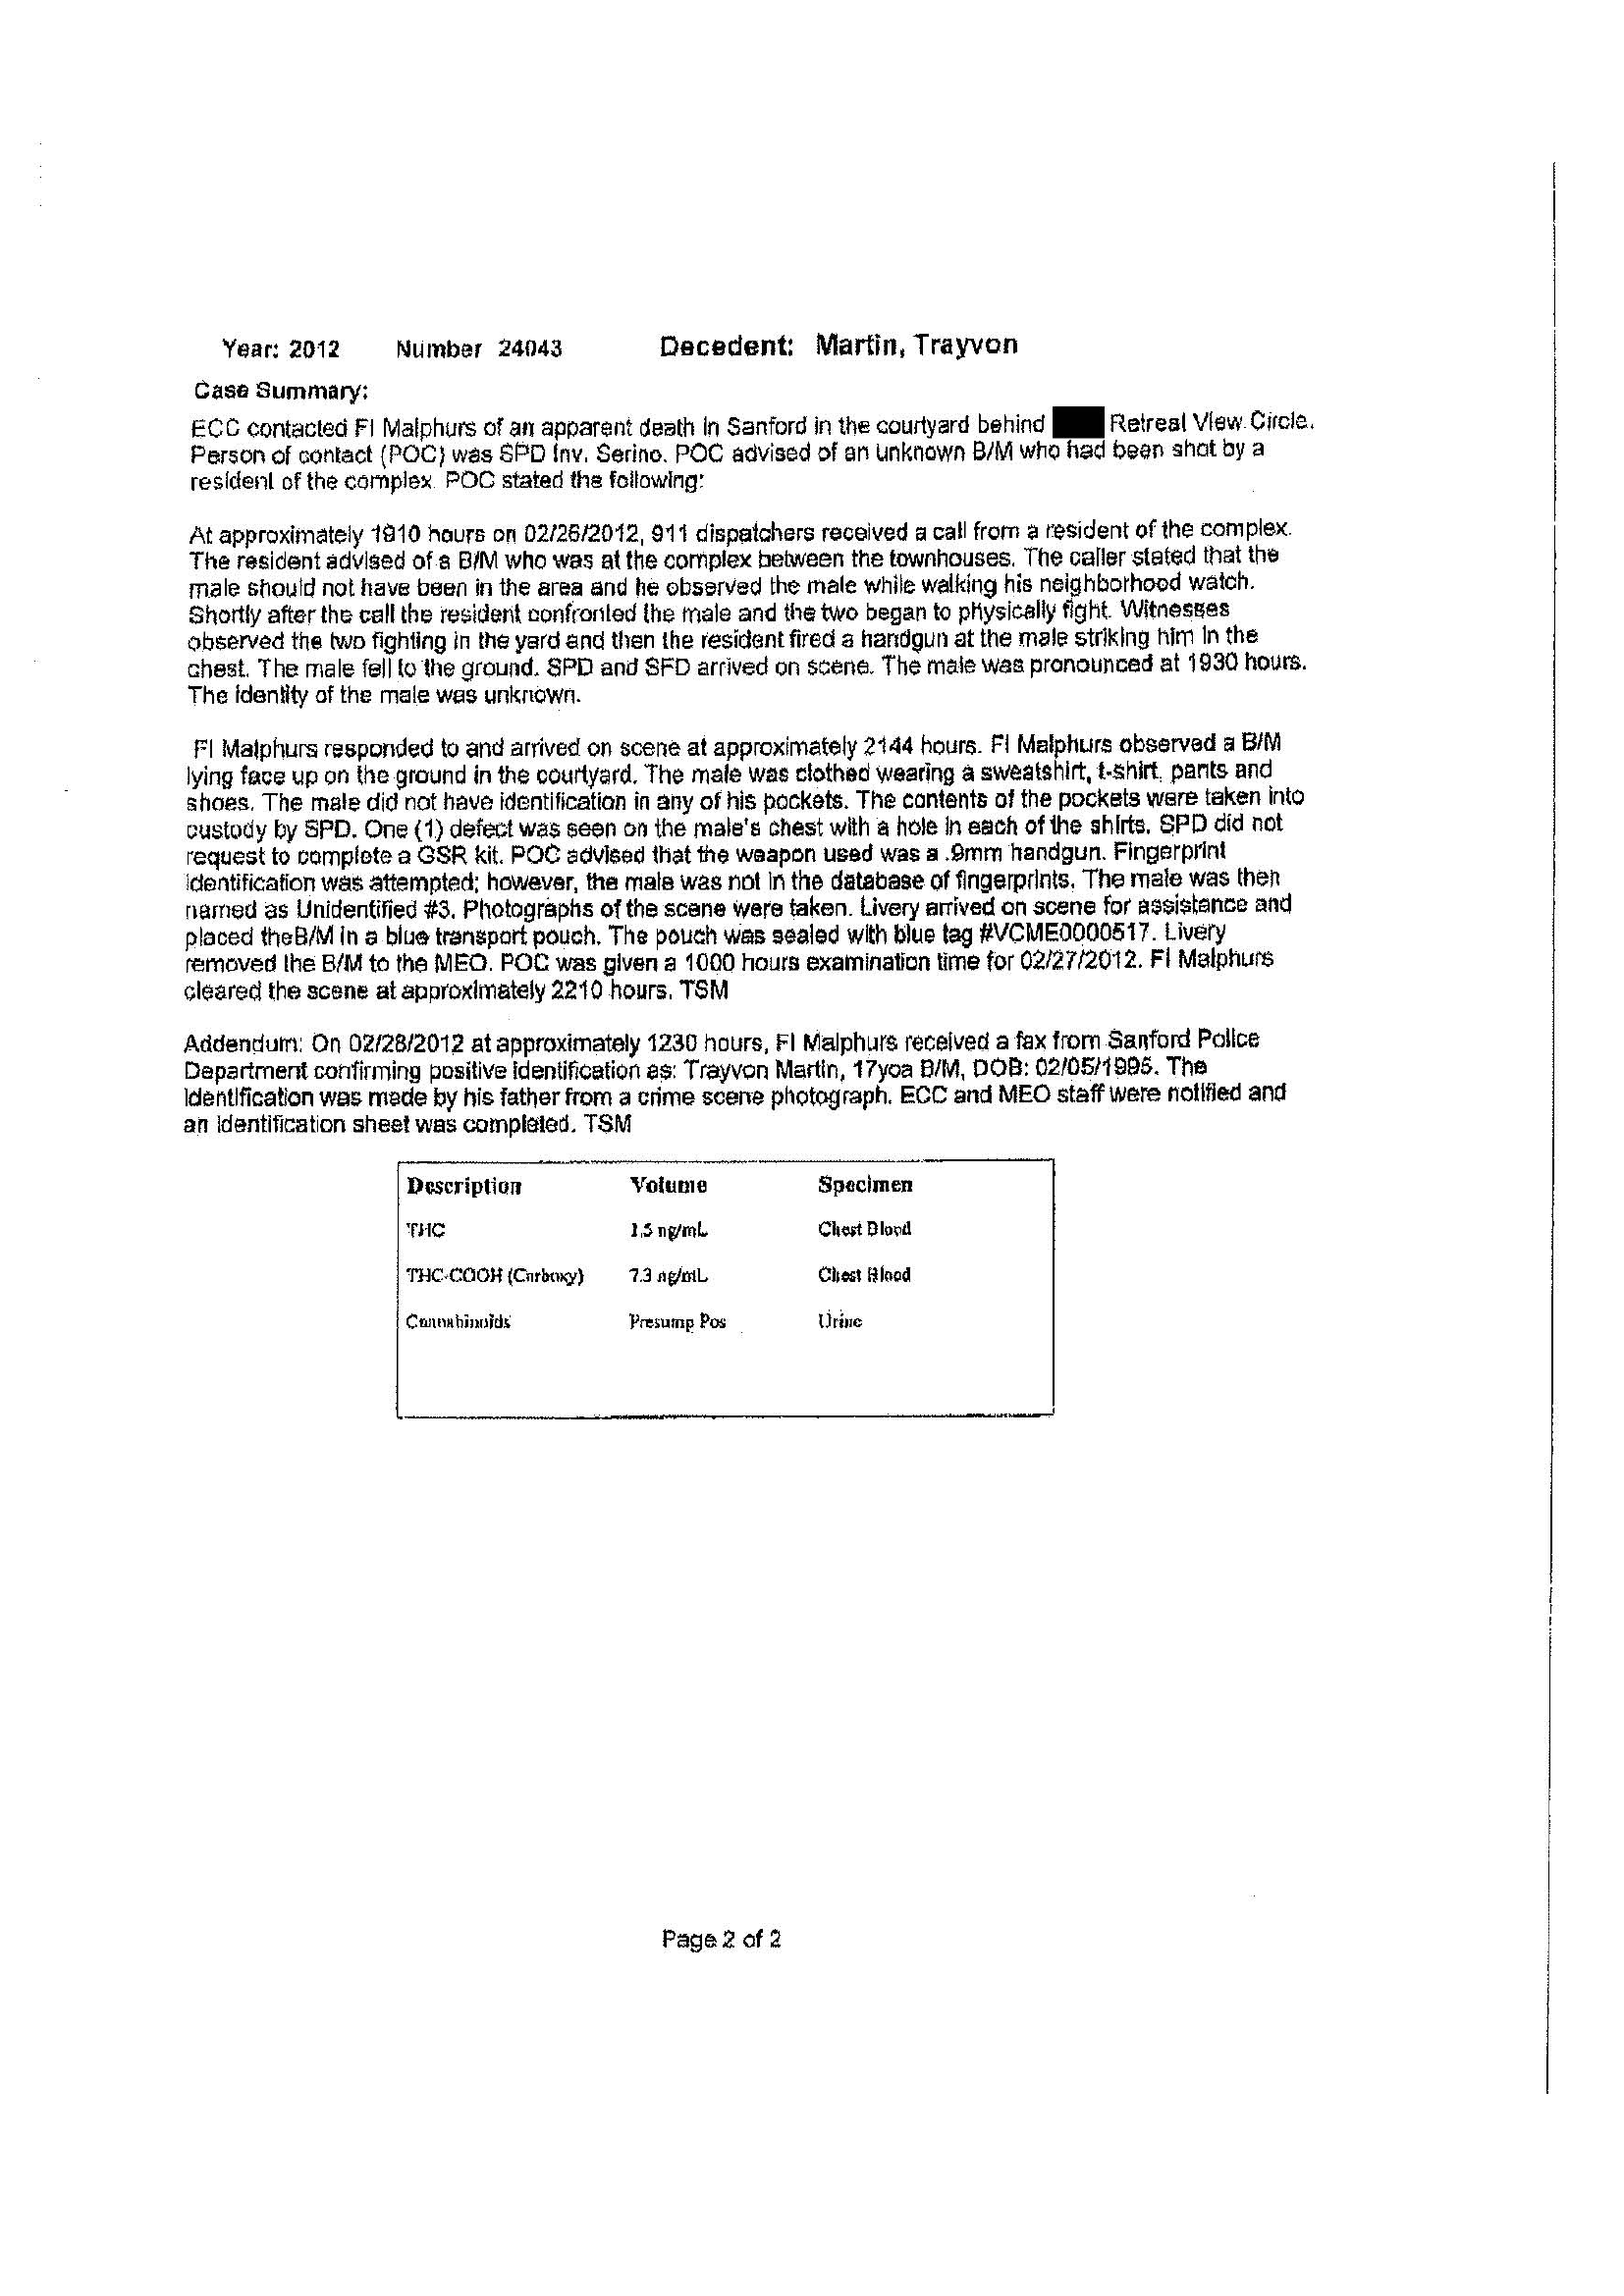

In [5]:
# Original document image
document.images[0]

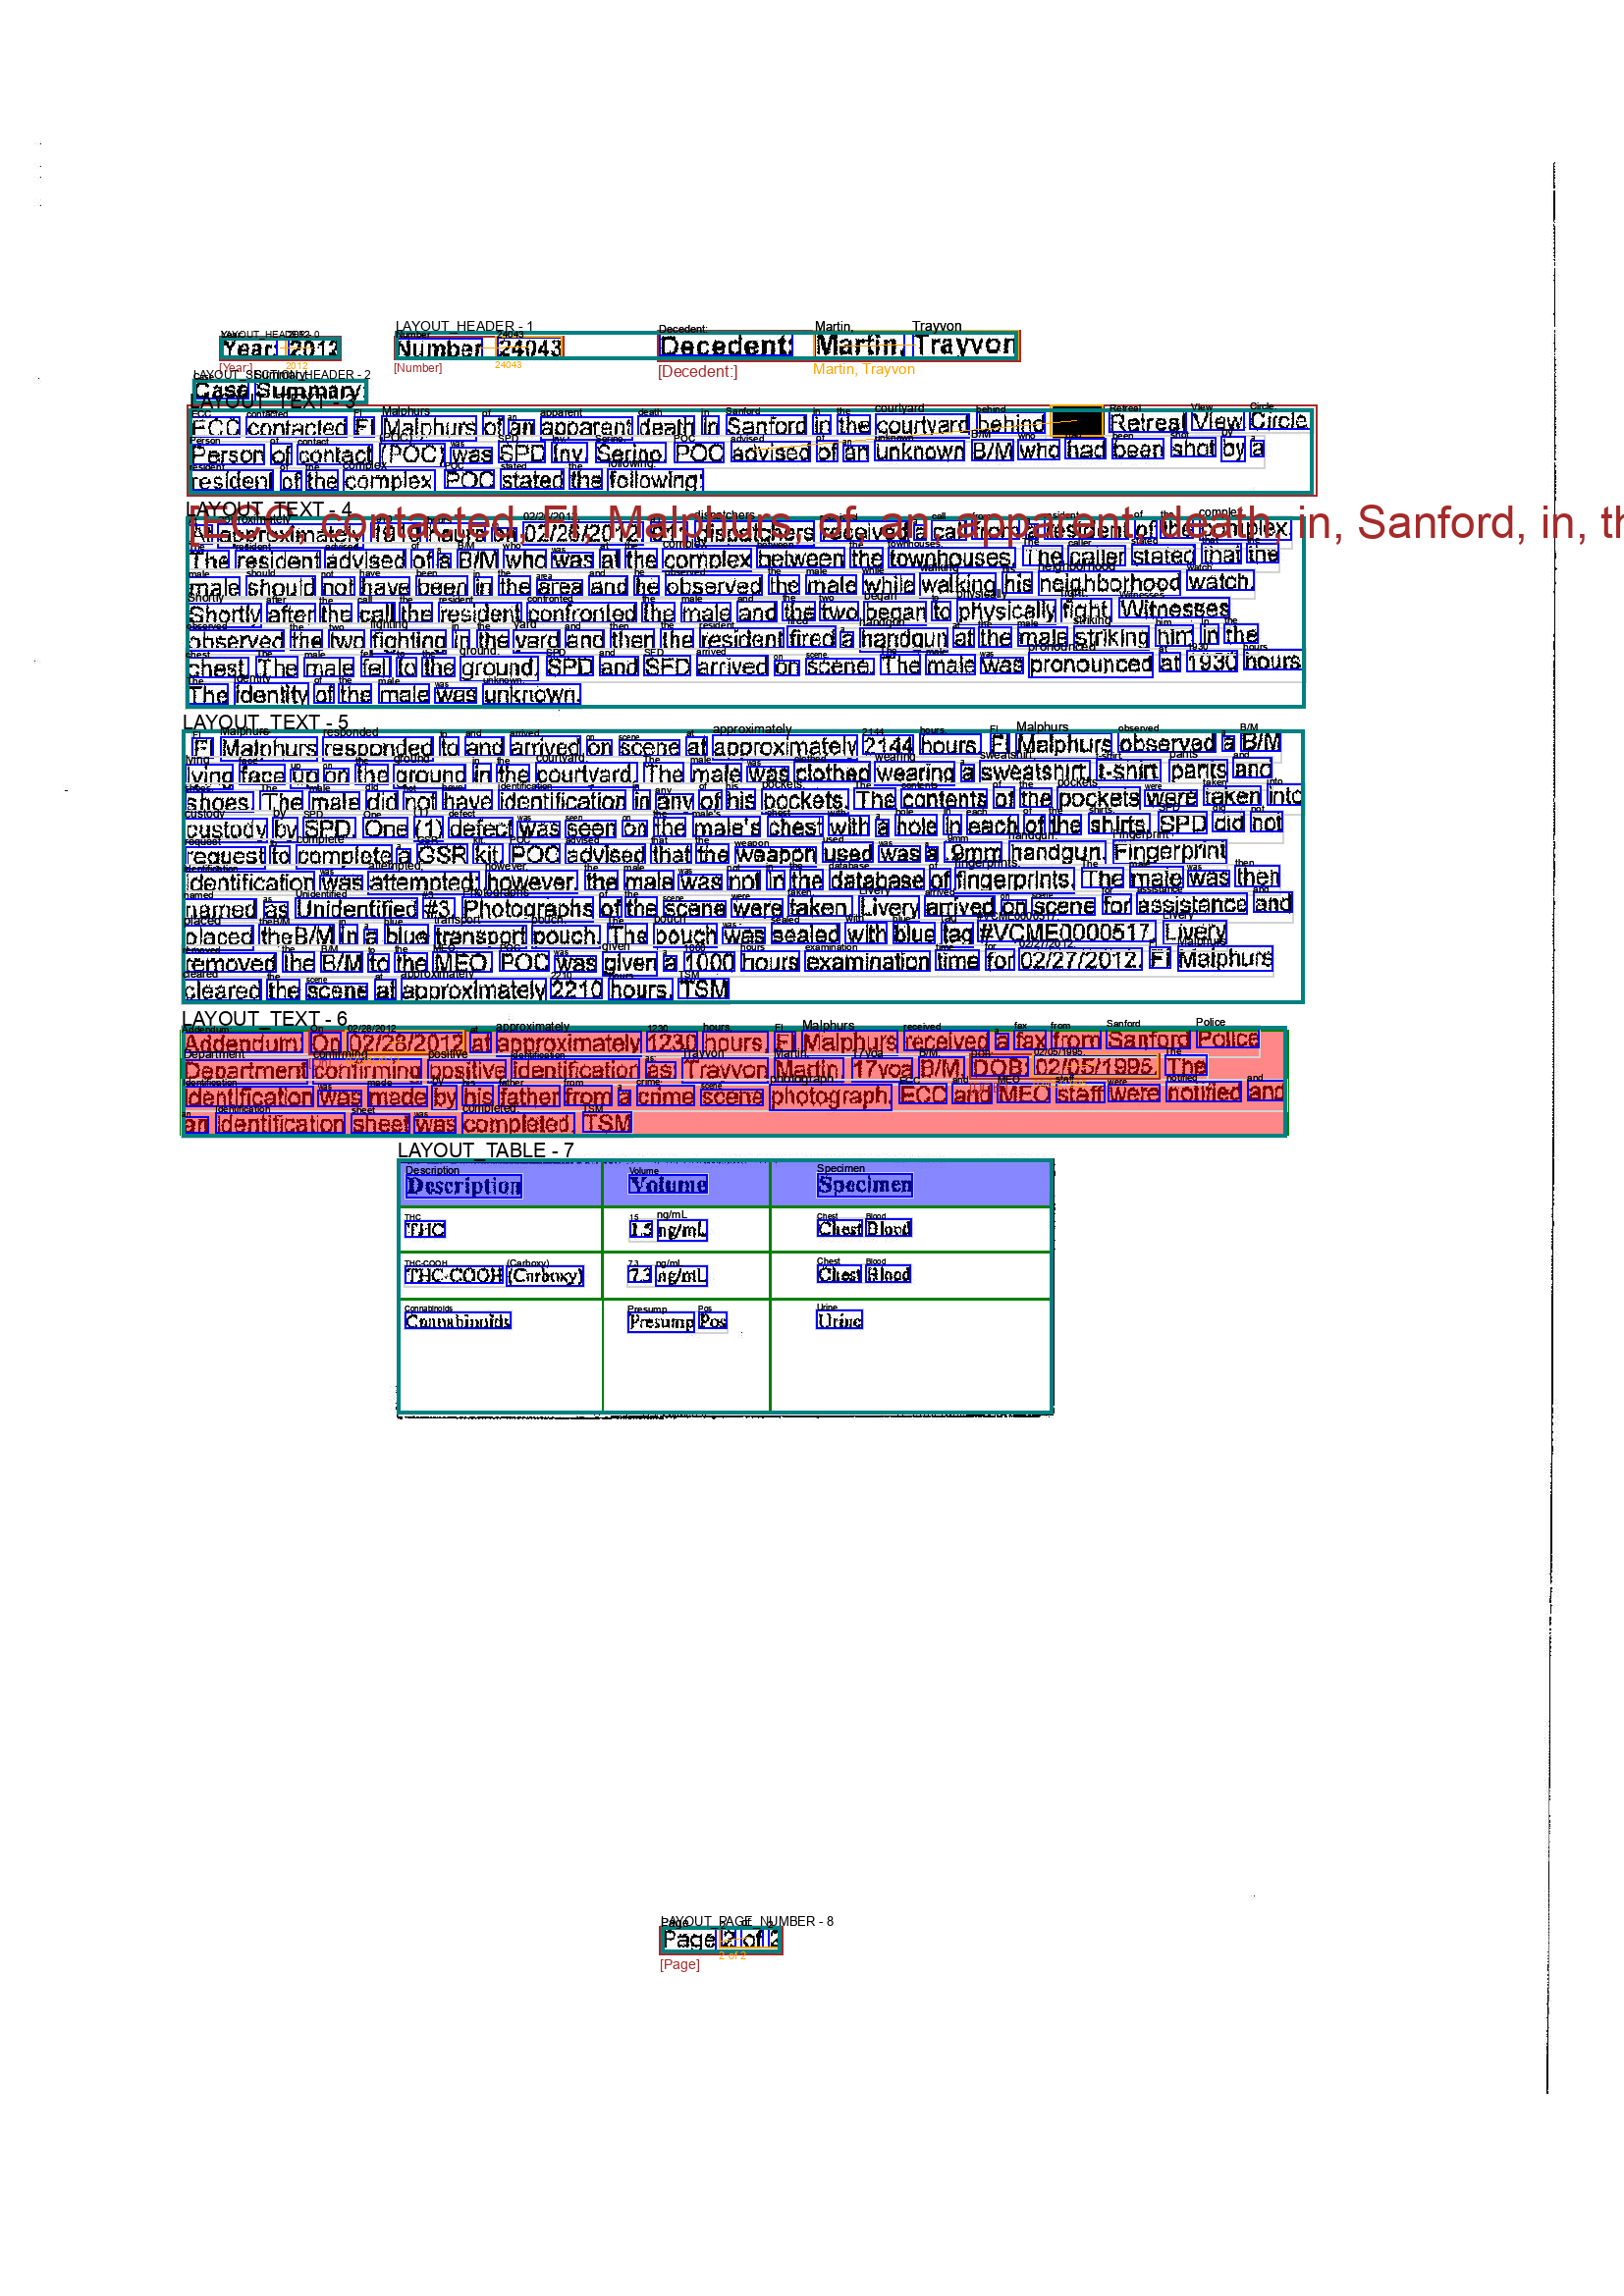

In [6]:
document.visualize()

## Document Properties

In [7]:
print(f"document height:{document.height}, width:{document.width} number of pages:{document.num_pages}")

document height:0, width:0 number of pages:1


### Bounding Box

It is unclear the unit and scale of the coordinate of the bounding boxes.

* [[Doc] BoundingBox coordinate unit and scale are unclear #319](https://github.com/aws-samples/amazon-textract-textractor/issues/319)

* [classtextractor.entities.bbox.BoundingBox(x: float, y: float, width: float, height: float, spatial_object=None)](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html?highlight=tabletitle#textractor.entities.bbox.BoundingBox)

> Represents the bounding box of an object in the format of a dataclass with (x, y, width, height). By default BoundingBox is set to work with denormalized co-ordinates: ```x: (0, document-width)```, ```y: (0, document-height)```. Use the ```as_normalized_dict``` function to obtain BoundingBox with normalized co-ordinates: ```x: (0, 1)```, ```y: (0, 1)```

* [Bounding Box](https://docs.aws.amazon.com/textract/latest/dg/text-location.html#bounding-box)

> * Height – The height of the bounding box as a ratio of the overall document page height.
> * Left – The X coordinate of the top-left point of the bounding box as a ratio of the overall document page width.
> * Top – The Y coordinate of the top-left point of the bounding box as a ratio of the overall document page height.
> * Width – The width of the bounding box as a ratio of the overall document page width.
>   
> Each BoundingBox property has a value between 0 and 1. The value is a ratio of the overall image width (applies to Left and Width) or height (applies to Height and Top). For example, if the input image is 700 x 200 pixels, and the top-left coordinate of the bounding box is (350,50) pixels, the API returns a Left value of 0.5 (350/700) and a Top value of 0.25 (50/200).

> <img src="image/textract_bbox.png" align="left" width=300/>

In [8]:
bbox = document.pages[0].words[0].bbox
bbox

x: 0.40578076243400574, y: 0.14519663155078888, width: 0.08256930857896805, height: 0.009907064028084278

In [9]:
print(f"page height:{document.pages[0].height}, document page 0 image height:{document.images[0].height}")

page height:1.0, document page 0 image height:2339


## text

OCR text (left to right order according to 1).

1: [Amazon Textract’s new Layout feature introduces efficiencies in general purpose and generative AI document processing tasks (NOV 2023)](https://aws.amazon.com/blogs/machine-learning/amazon-textracts-new-layout-feature-introduces-efficiencies-in-general-purpose-and-generative-ai-document-processing-tasks/))

In [10]:
print(document.text)

 Year: 2012 

 Number 24043 Decedent: Martin, Trayvon 

Case Summary: 

 ECC contacted FI Malphurs of an apparent death in Sanford in the courtyard behind Retreal View Circle. Person of contact (POC) was SPD Inv. Serino. POC advised of an unknown B/M who had been shot by a resident of the complex POC stated the following: 

At approximately 1910 hours on 02/26/2012, 911 dispatchers received a call from a resident of the complex. The resident advised of 8 B/M who was at the complex between the townhouses. The caller stated that the male should not have been in the area and he observed the male while walking his neighborhood watch. Shortly after the call the resident confronted the male and the two began to physically fight. Witnesses observed the two fighting in the yard and then the resident fired a handgun at the male striking him In the chest. The male fell to the ground. SPD and SFD arrived on scene. The male was pronounced at 1930 hours. The identity of the male was unknown. 

FI M

In [11]:
print(document.get_text())

 Year: 2012 

 Number 24043 Decedent: Martin, Trayvon 

Case Summary: 

 ECC contacted FI Malphurs of an apparent death in Sanford in the courtyard behind Retreal View Circle. Person of contact (POC) was SPD Inv. Serino. POC advised of an unknown B/M who had been shot by a resident of the complex POC stated the following: 

At approximately 1910 hours on 02/26/2012, 911 dispatchers received a call from a resident of the complex. The resident advised of 8 B/M who was at the complex between the townhouses. The caller stated that the male should not have been in the area and he observed the male while walking his neighborhood watch. Shortly after the call the resident confronted the male and the two began to physically fight. Witnesses observed the two fighting in the yard and then the resident fired a handgun at the male striking him In the chest. The male fell to the ground. SPD and SFD arrived on scene. The male was pronounced at 1930 hours. The identity of the male was unknown. 

FI M

## words

In [12]:
print(document.words)

[Decedent:, 24043, Year:, 2012, Martin,, Number, Trayvon, Case, Summary:, Circle., View, Retreal, behind, in, the, Sanford, in, of, an, death, ECC, FI, contacted, courtyard, apparent, Malphurs, a, shot, been, had, who, B/M, unknown, by, an, of, advised, SPD, POC, Inv., Serino., was, Person, contact, of, (POC), POC, stated, the, the, of, resident, following:, complex, of, the, resident, a, from, call, a, complex., received, 911, on, hours, 1910, At, 02/26/2012,, dispatchers, approximately, the, that, stated, The, caller, townhouses., the, between, was, at, the, who, B/M, of, 8, advised, resident, The, complex, watch., his, while, male, the, observed, and, he, area, the, in, have, been, not, neighborhood, should, male, walking, Witnesses, to, two, the, and, male, the, confronted, the, call, the, resident, fight., after, physically, began, Shortly, the, In, him, male, the, at, fired, a, resident, the, then, in, the, and, two, striking, the, observed, handgun, yard, fighting, hours., 1930,

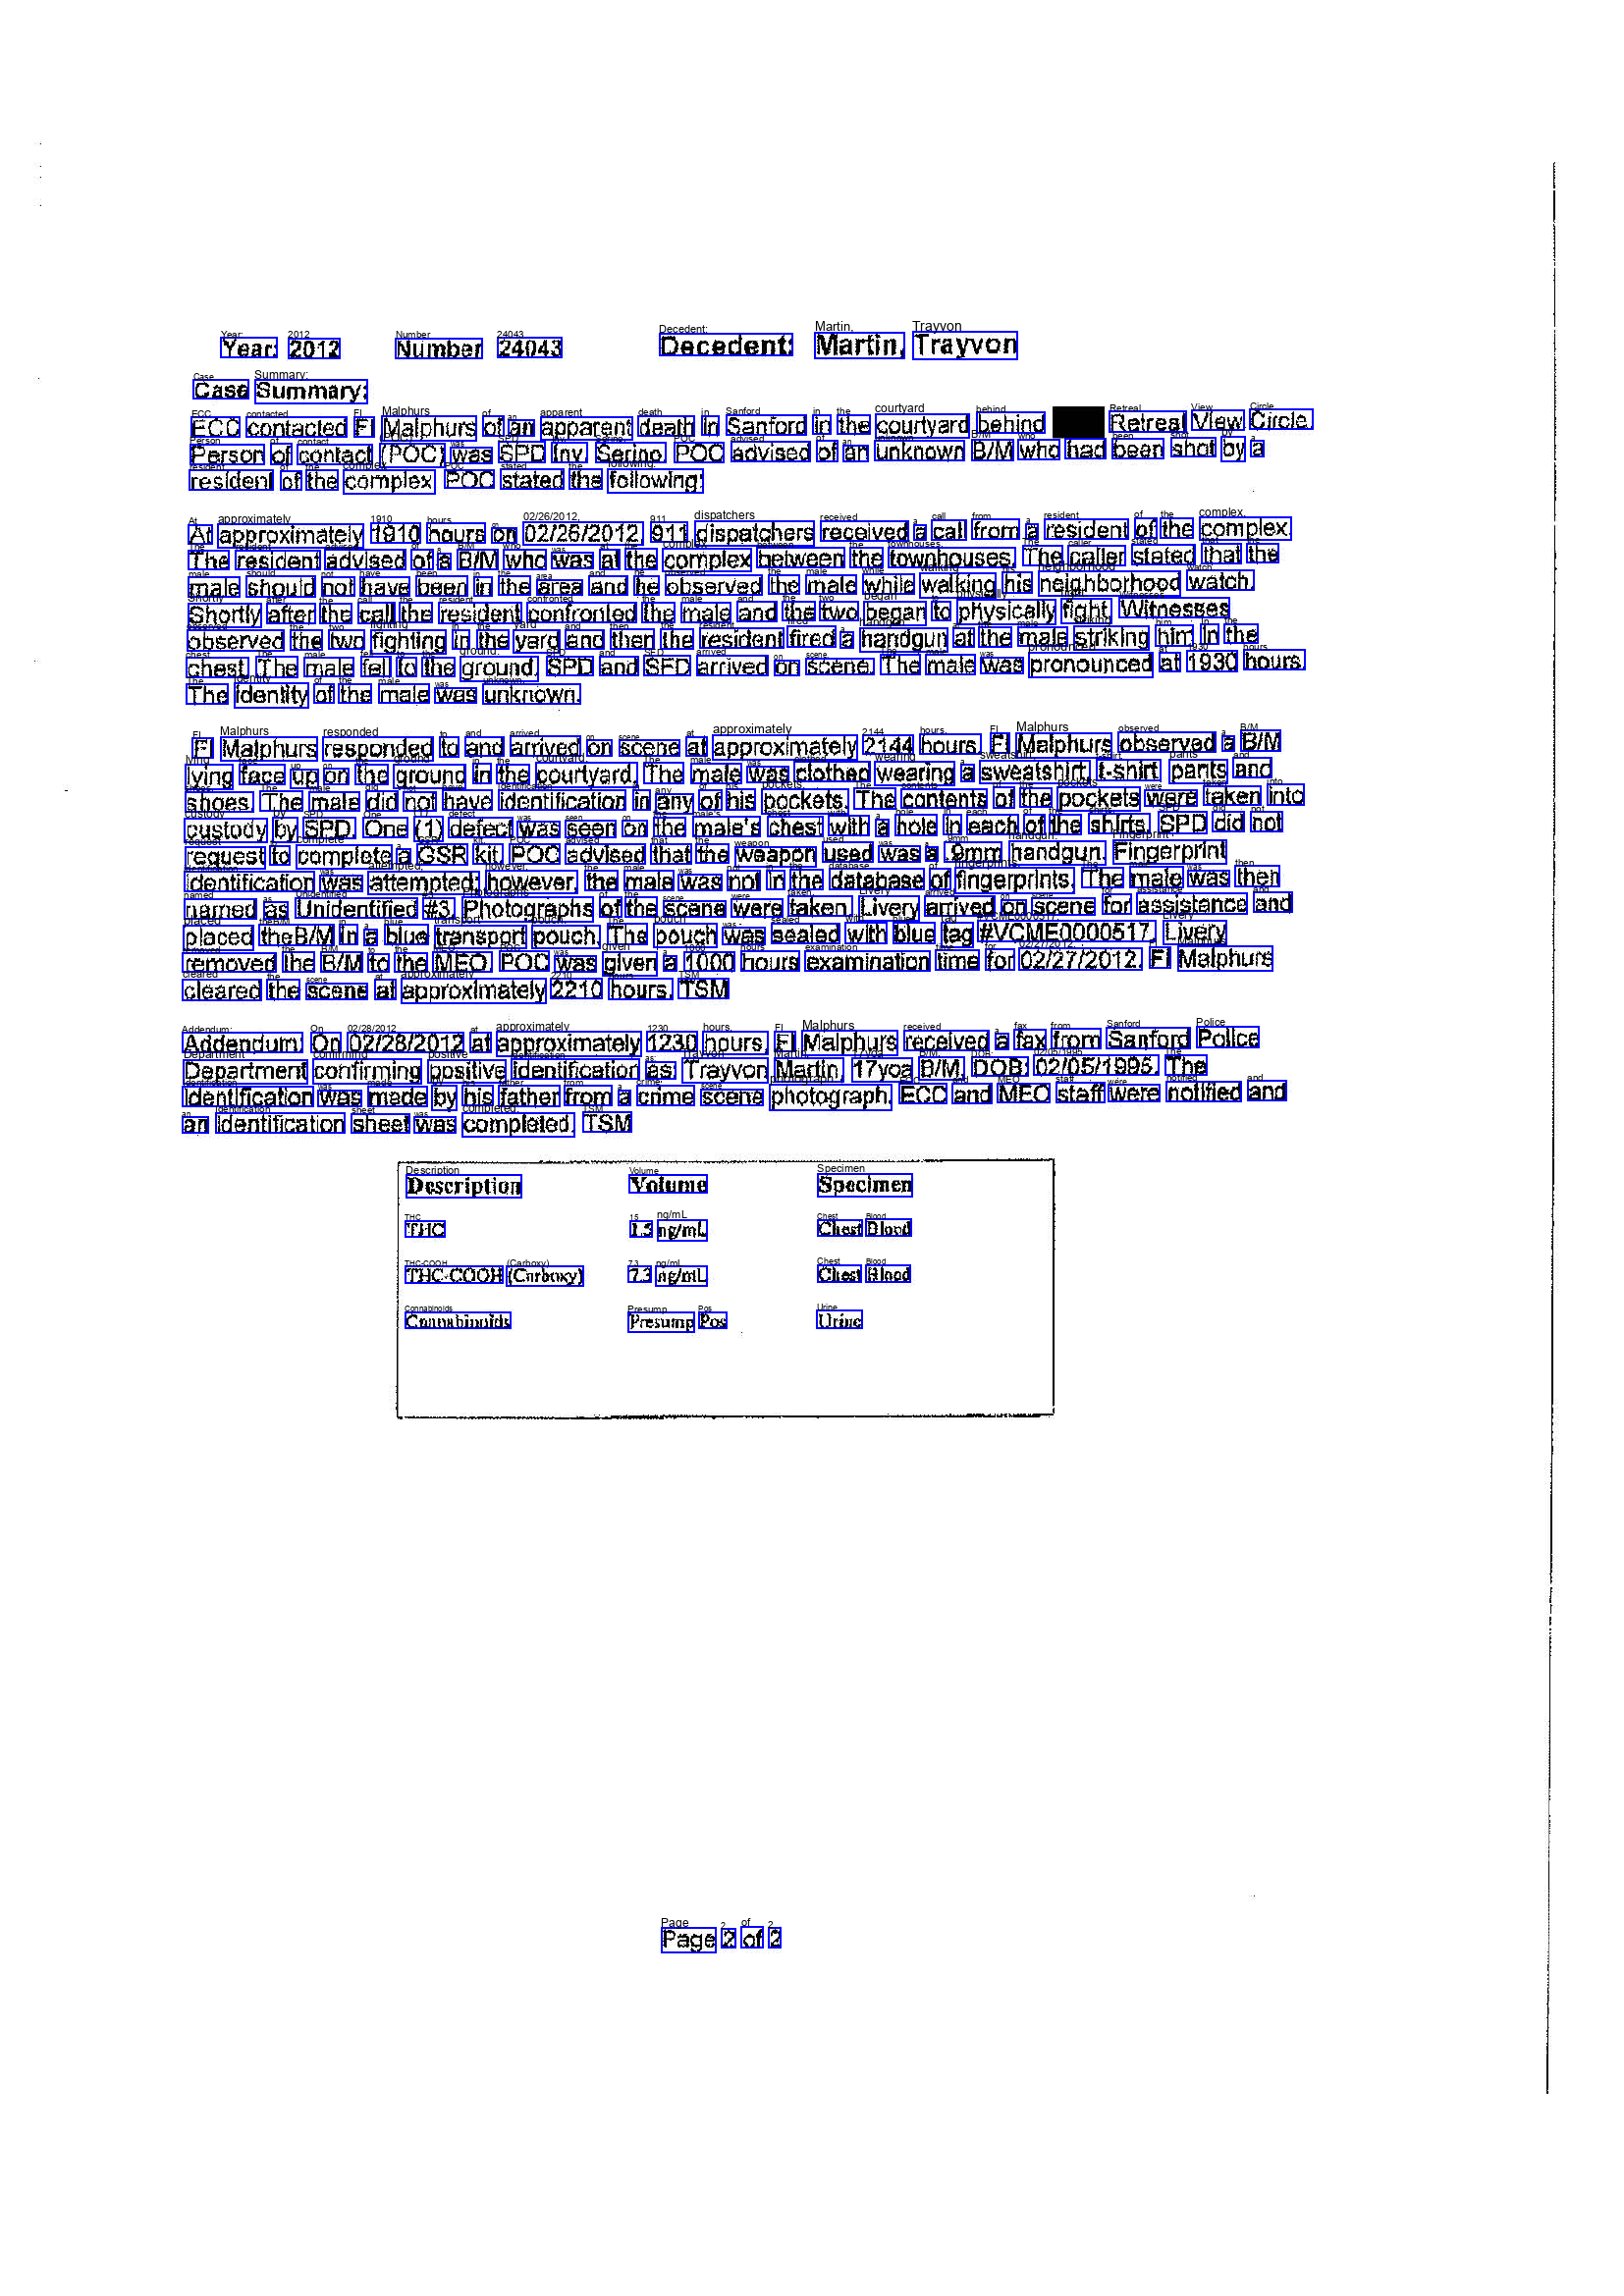

In [13]:
document.words.visualize()

# Table

* [Table](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.table)

> Represents a Table entity within the document. Tables are hierarchical objects composed of TableCell objects, which implicitly form columns and rows.
> >
> Table object contains associated metadata within it. They include TableCell information, headers, page number and page ID of the page within which it exists in the document.
> * property ```footer: List[TableFooter]```  
> Returns the table footers.

## Table Types

* [classtextractor.data.constants.TableTypes(value)](https://aws-samples.github.io/amazon-textract-textractor/textractor.data.constants.html?highlight=tabletypes)

> Types of tables recognized by Textract APIs.
> * SEMI_STRUCTURED= 2
> * STRUCTURED= 1
> * UNKNOWN= 0

## Table Cell
* [TableCell](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.table_cell)

> Represents a single TableCell:class: object. The TableCell objects contains information such as:
> * The position info of the cell within the encompassing Table
> * Properties such as merged-cells span
> * A hierarchy of words contained within the TableCell (optional)
> * Page information
> * Confidence of entity detection.
>
> #### Properties
> * property ```checkboxes: List[SelectionElement]```
> 
> * property ```col_index: int```   
> Returns the column index of the cell in the Table.
> 
> * property ```row_index: int```
> Returns the row index of the cell in the Table.

* [classtextractor.entities.table_cell.TableCell\(entity_id: str, bbox: BoundingBox, row_index: int, col_index: int, row_span: int, col_span: int, confidence: float = 0, is_column_header: bool = False, is_title: bool = False, is_footer: bool = False, is_summary: bool = False, is_section_title: bool = False\)](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html?highlight=checkbox#textractor.entities.table_cell.TableCell)

> * entity_id – Unique id of the TableCell object
> * bbox – Bounding box of the entity
> * row_index – Row index of position of cell within the table
> * col_index – Column index of position of cell within the table
> * row_span – How many merged cells does the cell spans horizontally (1 means no merged cells)
> * col_span – How many merged cells does the cell spand vertically (1 means no merged cells)
> * confidence – Confidence out of 100 with which the Cell was detected.
> * is_column_header – Indicates if the cell is a column header
> * is_title – Indicates if the cell is a table title
> * is_footer – Indicates if the cell is a table footer
> * is_summary – Indicates if the cell is a summary cell
> * is_section_title – Indicates if the cell is a section title

In [15]:
# dir(document.tables)
print(json.dumps(document.tables, indent=4, default=str))

[
    "Table\nRows - 4\nColumns - 3\nCells - 12\nMerged Cells - 0"
]


In [16]:
table: Table = document.tables[0]
# dir(table)

In [17]:
display(HTML(table.to_html()))

## Properties

### title 

There is a bug mistaking a text above the table as the title.

* [Mistake a text field above a table as table title](https://github.com/aws-samples/amazon-textract-textractor/issues/318)

In [18]:
# dir(table.title)
# Mistaking a text as a table title
table.title.text

'Addendum: On 02/28/2012 at approximately 1230 hours, FI Malphurs received a fax from Sanford Police Department confirming positive identification as: Trayvon Martin, 17yoa B/M, DOB: 02/05/1995. The Identification was made by his father from a crime scene photograph. ECC and MEO staff were notified and an Identification sheet was completed. TSM'

### type

In [19]:
print(table.table_type)

TableTypes.STRUCTURED


### column_headers

In [20]:
print(table.column_headers)

{}


### column_count and row_count

In [21]:
print(f"rows:{table.row_count} cols:{table.column_count}")

rows:4 cols:3


### trable_cells

In [22]:
cell: TableCell = None
for cell in table.table_cells:
    row_index: int = cell.row_index
    col_index: int = cell.col_index
    text: str = cell.text
    bbox: BoundingBox = cell.bbox
    (x, y, w, h) = (
        round(bbox.x, 2), round(bbox.y, 2), round(bbox.width, 2),round(bbox.height, 2)
    )
    
    print(f"row:{row_index} col:{col_index} text:{text:<20} bbox:{x,y,w,h}")

row:1 col:1 text:Description          bbox:(0.24, 0.5, 0.13, 0.02)
row:1 col:2 text:Volume               bbox:(0.37, 0.5, 0.1, 0.02)
row:1 col:3 text:Specimen             bbox:(0.47, 0.5, 0.17, 0.02)
row:2 col:1 text:THC                  bbox:(0.24, 0.53, 0.13, 0.02)
row:2 col:2 text:15 ng/mL             bbox:(0.37, 0.53, 0.1, 0.02)
row:2 col:3 text:Chest Blood          bbox:(0.47, 0.53, 0.17, 0.02)
row:3 col:1 text:THC-COOH (Carboxy)   bbox:(0.24, 0.55, 0.13, 0.02)
row:3 col:2 text:7.3 ng/mL            bbox:(0.37, 0.55, 0.1, 0.02)
row:3 col:3 text:Chest Blood          bbox:(0.47, 0.55, 0.17, 0.02)
row:4 col:1 text:Connabinoids         bbox:(0.24, 0.57, 0.13, 0.05)
row:4 col:2 text:Presump Pos          bbox:(0.37, 0.57, 0.1, 0.05)
row:4 col:3 text:Urine                bbox:(0.47, 0.57, 0.17, 0.05)


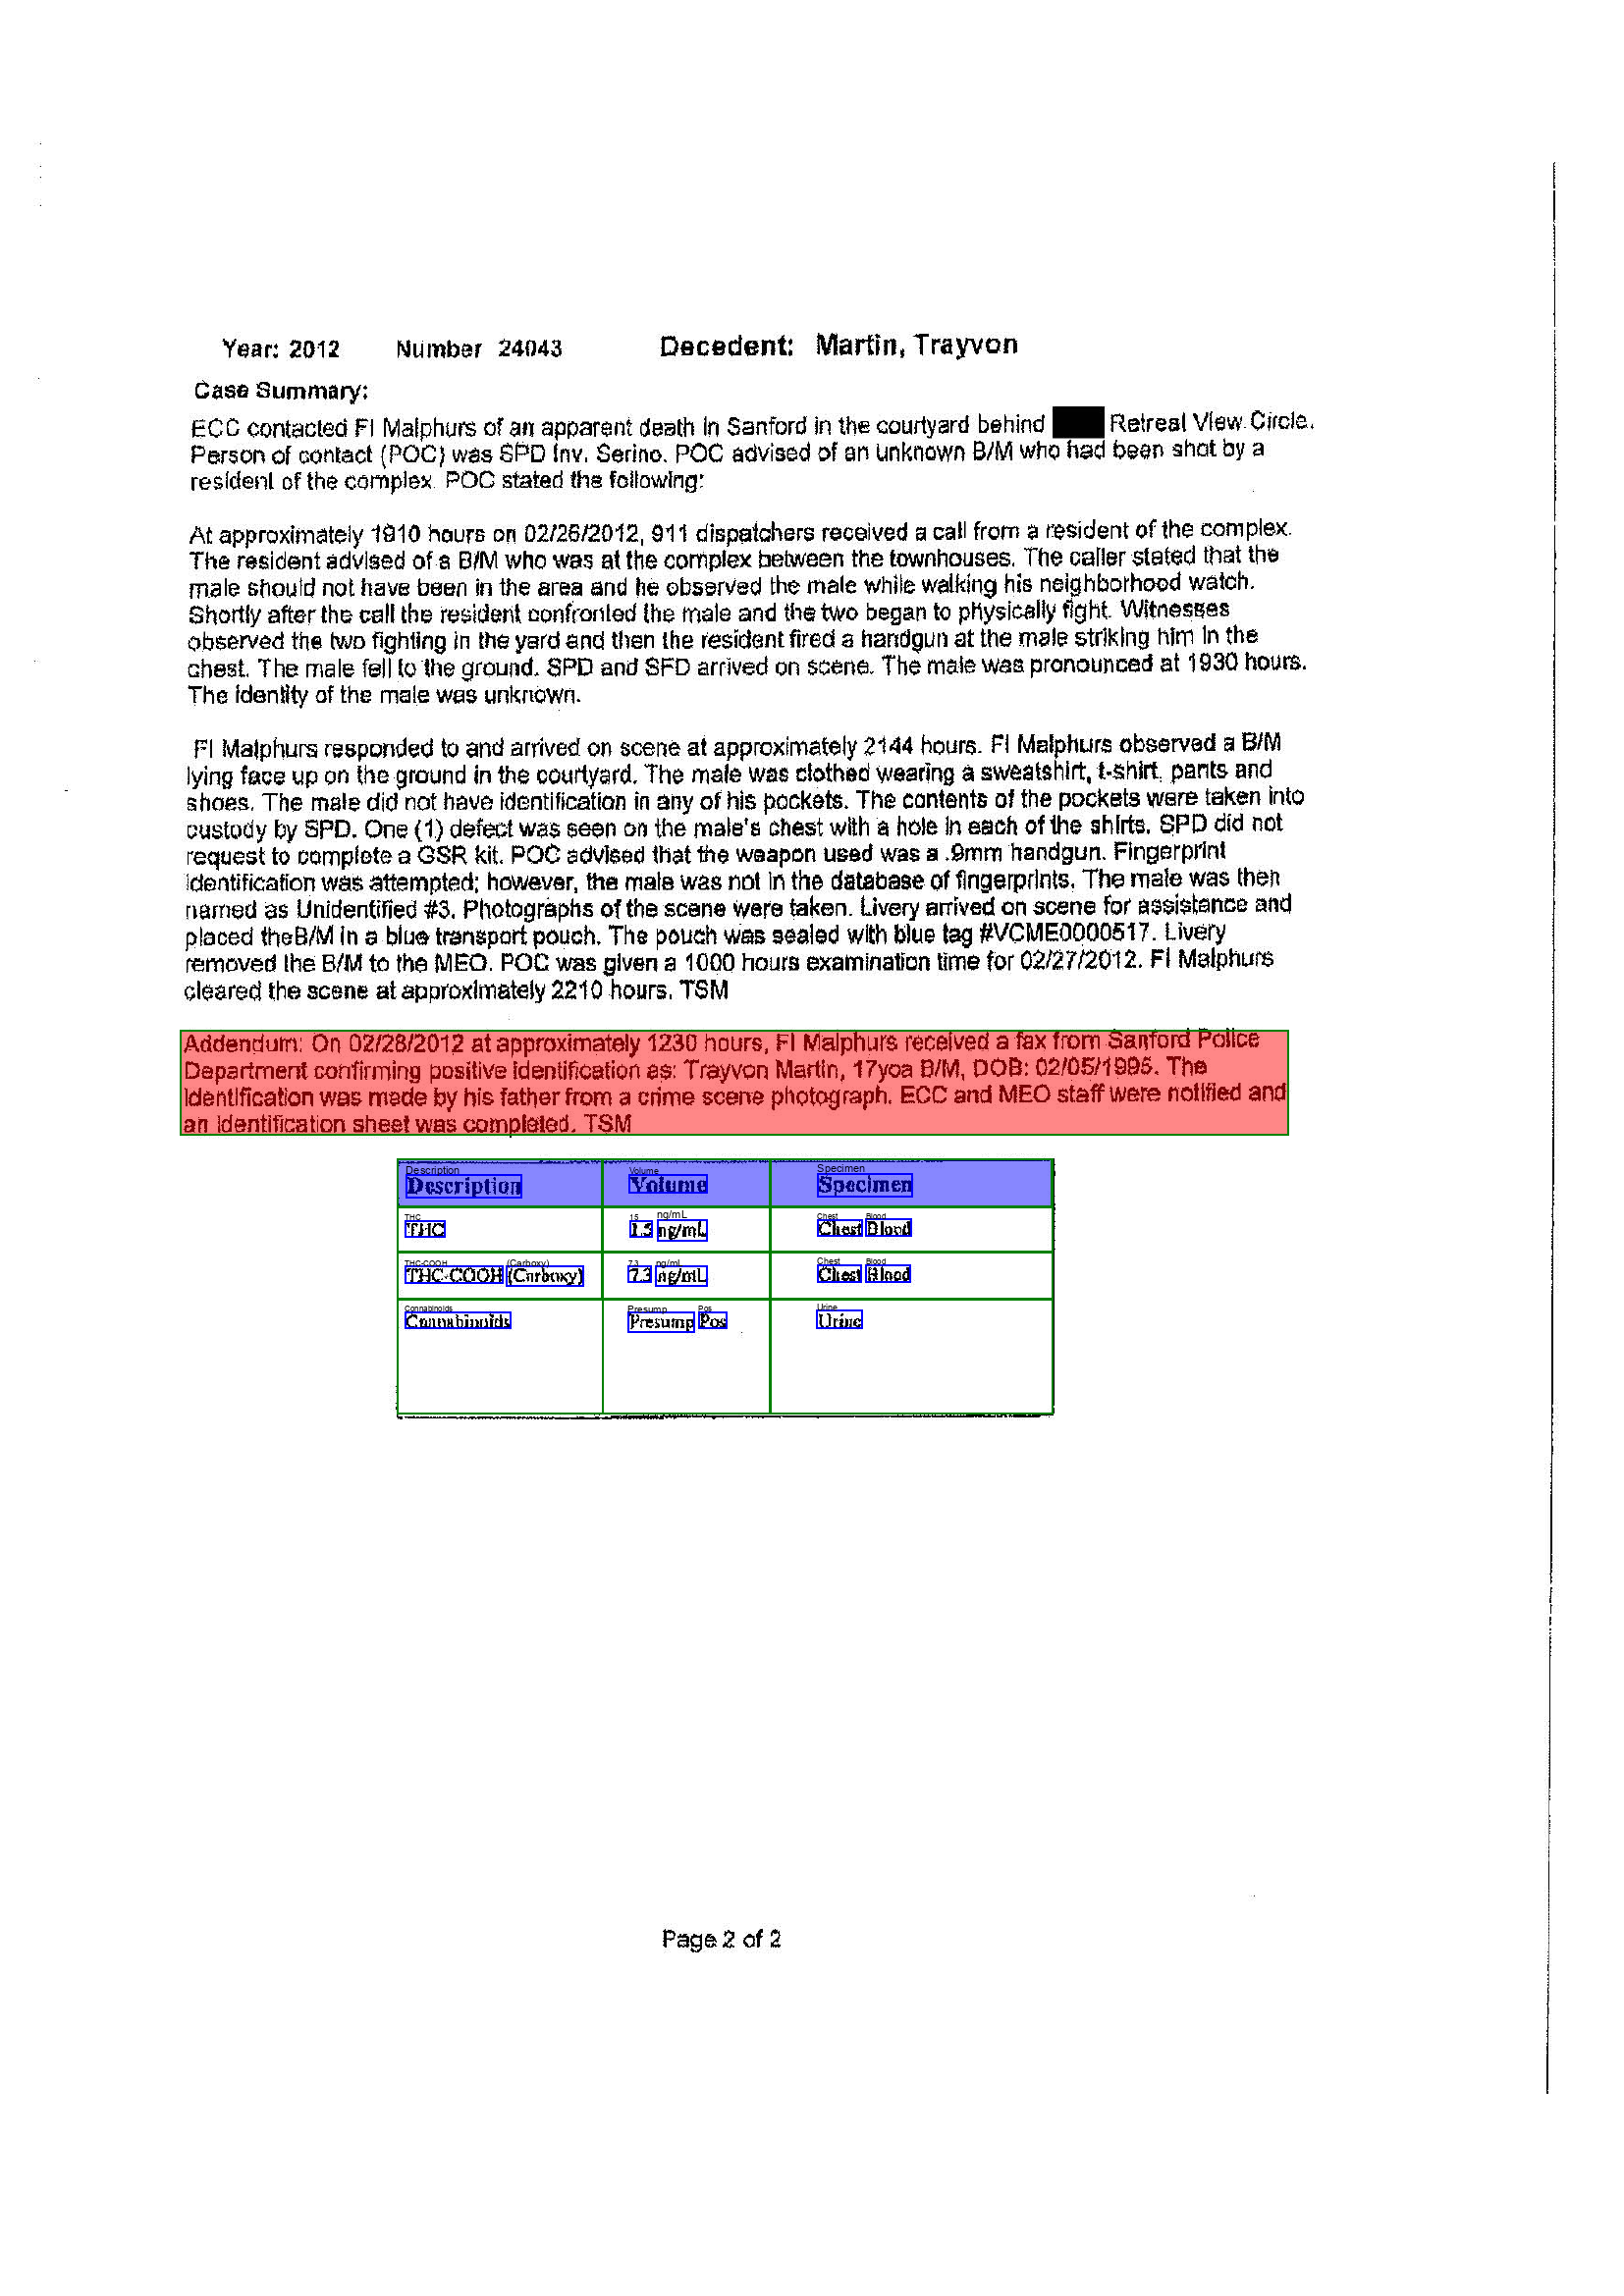

In [23]:
document.tables.visualize()

# KeyValue (Form)

```KeyValue``` represents a ```Form``` in the document and [Document](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.document) class ```get``` method or ```key_values``` property returns a list of ```KeyValue``` instances as ```EntityList```.

* [Document](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.document)

> * property [key_values: EntityList\[KeyValue\]](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.document.Document.key_values)     
> Returns a list of ```KeyValue``` objects, each representing a key-value pair within the Document.
>   
> * [get(key: str, top_k_matches: int = 1, similarity_metric: SimilarityMetric = SimilarityMetric.LEVENSHTEIN, similarity_threshold: float = 0.6)](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.document.Document.get)  
> Return up to **top_k**_matches of key-value pairs **as an Entity List** [EntityList](https://aws-samples.github.io/amazon-textract-textractor/textractor.visualizers.html#textractor.visualizers.entitylist.EntityList)\[[KeyValue\]](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.key_value.KeyValue) for the **key** that is queried from the document, sorted from highest to lowest similarity.


## key/vlue class


* [KeyValue](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.key_value)
  
> The ```KeyValue``` entity is a document entity representing the ```Forms``` output. The ```key``` in ```KeyValue``` are typically ```words``` and the ```Value``` could be ```Word``` elements or ```SelectionElement``` in case of checkboxes.
> 
> This class contains the associated metadata with the KeyValue entity including the ```entity ID```, [bounding box](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.bbox) information, ```value```, existence of checkbox, ```page number```, ```Page ID``` and ```confidence``` of detection.
>
> * property ```key: Line```  
> Returns [Line](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.line) object associated with the key.
>
> * property ```value: Value```  
> Returns the [Value](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.value.Value) mapped to the ```key``` if it has been assigned.

**NOTE**: Defeect as per [The key property of the KeyValue class does not return Line instance](https://github.com/aws-samples/amazon-textract-textractor/issues/317), the ```key``` property of the ```KeyValue``` class is not ```Line``` instance but just a List.

* [classtextractor.entities.key_value.KeyValue(entity_id: str, bbox: BoundingBox, contains_checkbox: bool = False, value: Optional[Value] = None, confidence: float = 0)](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.key_value.KeyValue)

> * entity_id (str) – Unique identifier of the KeyValue entity.
> * bbox (BoundingBox) – Bounding box of the KeyValue entity.
> * contains_checkbox (bool) – True/False to indicate if the value is a checkbox.
> * value (Value) – Value object that maps to the KeyValue entity.
> * confidence (float) – confidence with which the entity was detected.


**Note** that 
1. ```get``` returns [EntityList](https://aws-samples.github.io/amazon-textract-textractor/textractor.visualizers.html#textractor.visualizers.entitylist.EntityList), **NOT dictionaries**.
2. [key](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.key_value.KeyValue.key) is [Line](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.line.Line) instance and [value](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.key_value.KeyValue.value) is [Value](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.key_value.KeyValue.value) instance, **NOT string**. 

### Line class (key)

* [classtextractor.entities.line.Line\(entity_id: str, bbox: BoundingBox, words: Optional\[List\[Word\]\] = None, confidence: float = 0\)](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.line)

> Represents a single ```Line``` Entity within the Document. The Textract API response returns groups of words as LINE BlockTypes. They contain Word entities as children. This class contains the associated metadata with the Line entity including the ```entity ID```, [bounding box](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.bbox), child [word](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.word)s, ```page number```, ```Page ID``` and ```confidence``` of detection.
>
> * property ```text: str```
> Returns the text transcription of the ```Line``` entity.
> 
> * property ```words: List[Word]```
> Returns the line’s children as a list of [Word](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.word) instances.


### Value class (value)
* [classtextractor.entities.value.Value\(entity_id: str, bbox: BoundingBox, confidence: float = 0\)](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.value.Value)

> Represents a single ```Value``` Entity within the Document. The Textract API response returns groups of words as ```KEY_VALUE_SET``` BlockTypes. These may be of ```KEY``` or ```VALUE``` type which is indicated by the ```EntityType``` attribute in the JSON response.
> 
> This class contains the associated metadata with the Value entity including the entity ID, [bounding box](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.bbox), child [word](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.word)s, associated ```key ID```, ```page number```, ```Page ID```, ```confidence``` of detection and if it’s a checkbox.
>
> * property ```words: List[Word]```  
> Returns a list of all words in the entity if it exists else returns the checkbox status of the Value entity.


### Word class

* [class textractor.entities.word.Word\(entity_id: str, bbox: BoundingBox, text: str = '', text_type: TextTypes = TextTypes.PRINTED, confidence: float = 0, is_clickable: bool = False, is_structure: bool = False\)](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#textractor.entities.word.Word)

> Represents a single ```Word``` within the ```Document```. This class contains the associated metadata with the Word entity including the ```text``` transcription, text type, [bounding box](https://aws-samples.github.io/amazon-textract-textractor/textractor.entities.html#module-textractor.entities.bbox) information, ```page number```, ```Page ID``` and ```confidence``` of detection.
>
> * property ```text: str```  
> Returns the text transcription of the Word entity.


### EntityList class

* [EntityList](https://aws-samples.github.io/amazon-textract-textractor/textractor.visualizers.html#textractor.visualizers.entitylist.EntityList)

> The ```EntityList``` is an extension of ```list``` type with custom functions to print document entities in a well formatted manner and visualize on top of the document page with their BoundingBox information.
> 
> The two main functions within this class are ```pretty_print()``` and ```visualize()```. Use ```pretty_print()``` to get a string formatted output of your custom list of entities. Use ```visualize()``` to get the bounding box visualization of the entities on the document page images.



In [24]:
document.key_values

[Number : 24043,
 Year: : 2012,
 Decedent: : Martin, Trayvon,
 ECC contacted FI Malphurs of an apparent death in Sanford in the courtyard behind Retreal View Circle. Person of contact (POC) was SPD Inv. Serino. POC advised of an unknown B/M who had been shot by a resident of the complex POC stated the following: : ,
 On : 02/28/2012,
 DOB: : 02/05/1995.,
 Page : 2 of 2]

In [25]:
forms: EntityList[KeyValue] = document.key_values
form: KeyValue = None

print(f'{"page".ljust(4)} {"key".ljust(17, " ")} {"value".ljust(20)}')
print("-" * 100)
for form in forms:
    key: Line = form.key
    value: Value = form.value
    
    # print(f"type of value is {type(value)}.")
    # print(f"type of key is {type(key)}.")
    # print(f"type of value is {type(value)}.")

    page: int = form.page
    # key_text: str = key.text
    key_text: str = ' '.join(word.text for word in key)
    value_text = ' '.join([word.text for word in value.words])

    print(f"{page:<3}[{key_text:<15}]:[{value_text}]")

page key               value               
----------------------------------------------------------------------------------------------------
1  [Number         ]:[24043]
1  [Year:          ]:[2012]
1  [Decedent:      ]:[Martin, Trayvon]
1  [ECC contacted FI Malphurs of an apparent death in Sanford in the courtyard behind Retreal View Circle. Person of contact (POC) was SPD Inv. Serino. POC advised of an unknown B/M who had been shot by a resident of the complex POC stated the following:]:[]
1  [On             ]:[02/28/2012]
1  [DOB:           ]:[02/05/1995.]
1  [Page           ]:[2 of 2]


In [26]:
# NOTE: get method returns EntityList[KeyValue], not a Value.
# It is an extraction from the Document.key_value property.
document.get("Year")

[Year: : 2012]

In [27]:
document.get("DOB")

[DOB: : 02/05/1995.]

In [28]:
document.get("POC")

[ECC contacted FI Malphurs of an apparent death in Sanford in the courtyard behind Retreal View Circle. Person of contact (POC) was SPD Inv. Serino. POC advised of an unknown B/M who had been shot by a resident of the complex POC stated the following: : ]

In [29]:
document.get("Martin")

[[Number], [Year:], [Decedent:], [ECC, contacted, FI, Malphurs, of, an, apparent, death, in, Sanford, in, the, courtyard, behind, Retreal, View, Circle., Person, of, contact, (POC), was, SPD, Inv., Serino., POC, advised, of, an, unknown, B/M, who, had, been, shot, by, a, resident, of, the, complex, POC, stated, the, following:], [On], [DOB:], [Page]]


[]

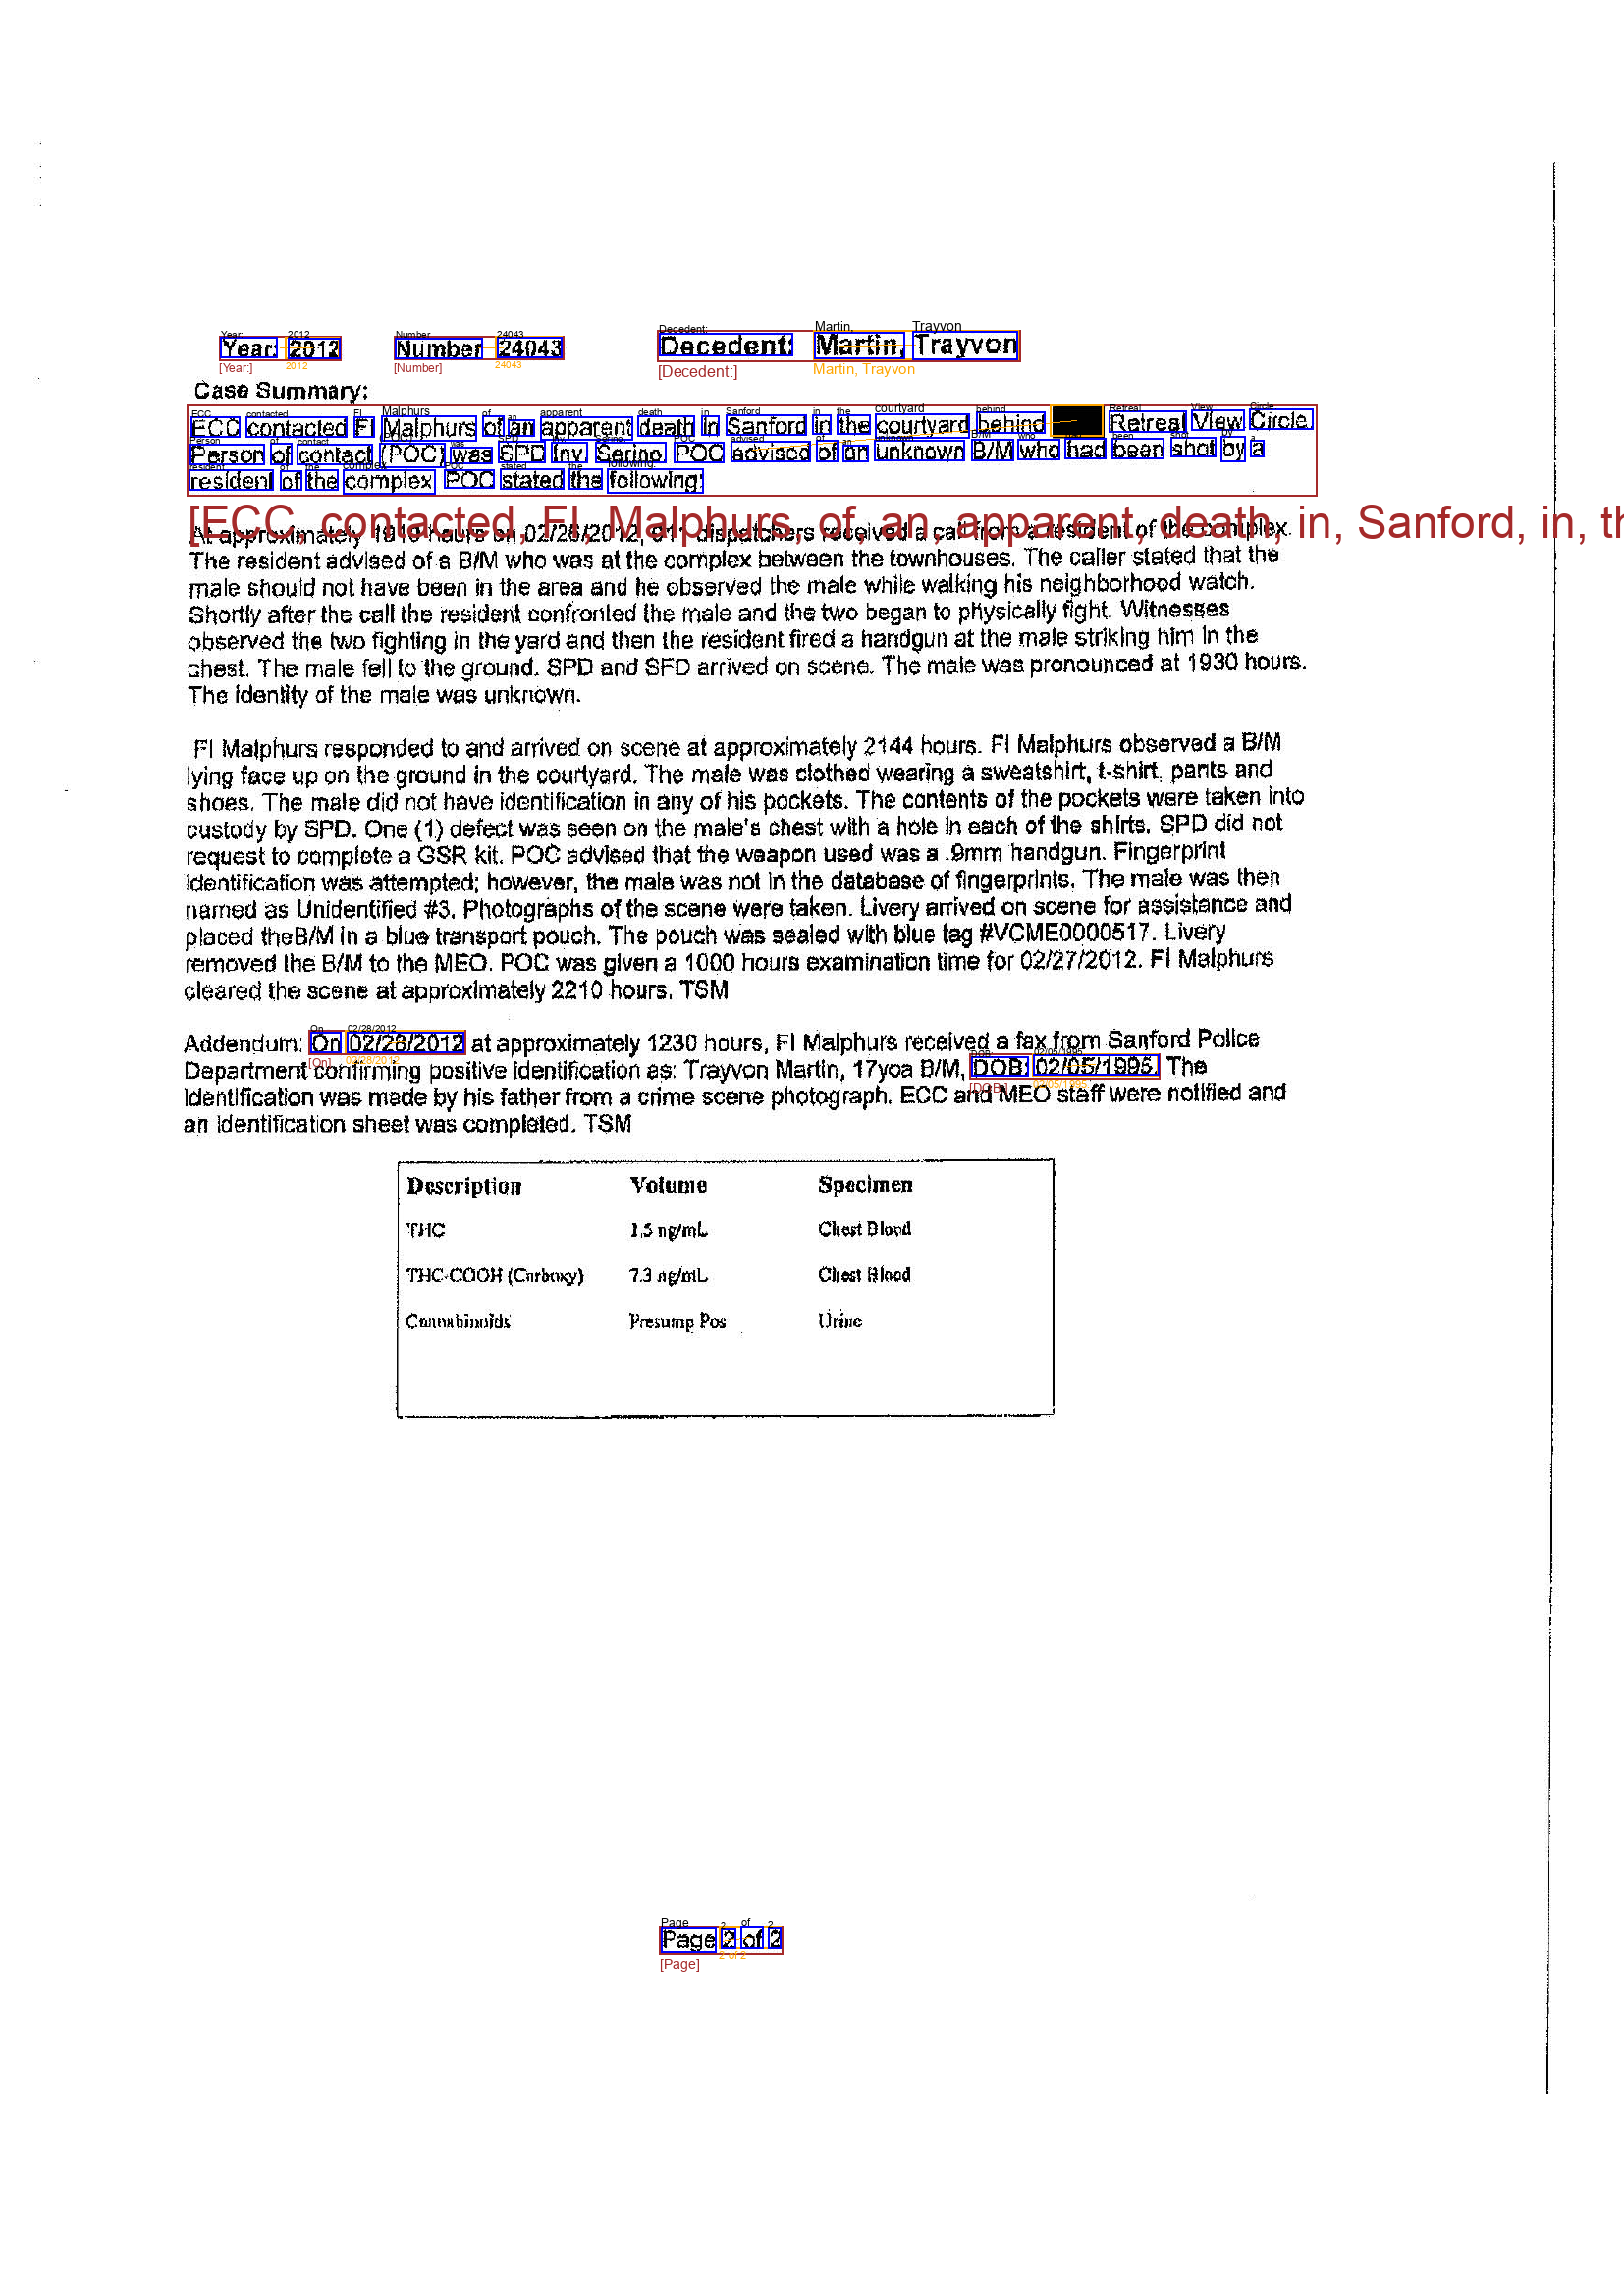

In [30]:
document.key_values.visualize()

[Decedent:,
 24043,
 Year:,
 2012,
 Martin,,
 Number,
 Trayvon,
 Case,
 Summary:,
 Circle.,
 View,
 Retreal,
 behind,
 in,
 the,
 Sanford,
 in,
 of,
 an,
 death,
 ECC,
 FI,
 contacted,
 courtyard,
 apparent,
 Malphurs,
 a,
 shot,
 been,
 had,
 who,
 B/M,
 unknown,
 by,
 an,
 of,
 advised,
 SPD,
 POC,
 Inv.,
 Serino.,
 was,
 Person,
 contact,
 of,
 (POC),
 POC,
 stated,
 the,
 the,
 of,
 resident,
 following:,
 complex,
 of,
 the,
 resident,
 a,
 from,
 call,
 a,
 complex.,
 received,
 911,
 on,
 hours,
 1910,
 At,
 02/26/2012,,
 dispatchers,
 approximately,
 the,
 that,
 stated,
 The,
 caller,
 townhouses.,
 the,
 between,
 was,
 at,
 the,
 who,
 B/M,
 of,
 8,
 advised,
 resident,
 The,
 complex,
 watch.,
 his,
 while,
 male,
 the,
 observed,
 and,
 he,
 area,
 the,
 in,
 have,
 been,
 not,
 neighborhood,
 should,
 male,
 walking,
 Witnesses,
 to,
 two,
 the,
 and,
 male,
 the,
 confronted,
 the,
 call,
 the,
 resident,
 fight.,
 after,
 physically,
 began,
 Shortly,
 the,
 In,
 him,
 

---
# Page

In [34]:
page = document.pages[0]
# dir(page)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_checkboxes',
 '_container_layouts',
 '_expense_documents',
 '_get_coords',
 '_get_kv_with_direction',
 '_key_values',
 '_leaf_layouts',
 '_lines',
 '_queries',
 '_search_lines_with_similarity',
 '_search_words_with_similarity',
 '_signatures',
 '_tables',
 '_update_entity_page_num',
 '_words',
 'checkboxes',
 'child_ids',
 'container_layouts',
 'directional_finder',
 'expense_documents',
 'export_kv_to_csv',
 'export_kv_to_txt',
 'export_tables_to_excel',
 'filter_checkboxes',
 'get',
 'get_text',
 'get_text_and_words',
 'get_words_by_

---
# LLM/BedRock for Summary

In [37]:
import boto3 


def get_response_from_claude(context, prompt_data):
    body = json.dumps({
        "prompt": f"""Human: Given the following document:
        {context}
        Answer the following:\n {prompt_data}
        Assistant:""",
        "max_tokens_to_sample": 2000,
        "top_k": 1,
    })
    modelId = f'anthropic.claude-instant-v1' # change this to use a different version from the model provider
    accept = '*/*'
    contentType = 'application/json'

    response = bedrock.invoke_model(body=body, modelId=modelId, accept=accept, contentType=contentType)
    response_body = json.loads(response.get('body').read())
    answer = response_body.get('completion')

    return answer

os.environ["AWS_DEFAULT_REGION"] = "us-west-2"
os.environ["BEDROCK_ENDPOINT_URL"] = "https://bedrock-runtime.us-west-2.amazonaws.com"

bedrock = boto3.client(
    service_name='bedrock-runtime',
    region_name='us-west-2',
    endpoint_url=f'https://bedrock-runtime.us-west-2.amazonaws.com'
)

In [38]:
print(get_response_from_claude(
    document.get_text(),
    """
    - What is the summary of the document?
    """
))

AccessDeniedException: An error occurred (AccessDeniedException) when calling the InvokeModel operation: You don't have access to the model with the specified model ID.